Import needed libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Split the data to *X* and *Y***

In [5]:
print('Data shape:', df.shape)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('X shape:',X.shape)
print('y shape:',y.shape)

Data shape: (284807, 31)
X shape: (284807, 30)
y shape: (284807,)


**The number of Fraud and Not Fraud**

In [6]:
classes = {0:'Not Fraud', 1:'Fraud'}
classes_names = ['Not Fraud', 'Fraud']
print(df.Class.value_counts().rename(index = classes))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Split the data to 4 parts: ***X_train***, ***X_test***, ***y_train***, ***y_test***

In [7]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0, shuffle=True)

#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (190820, 30)
y_train shape: (190820,)
X_test shape: (93987, 30)
y_test: (93987,)


We apply the ***1st*** model ***LogisticRegression***

Logistic Regression Train Score:  99.92
Logistic Regression Test Score:  99.91


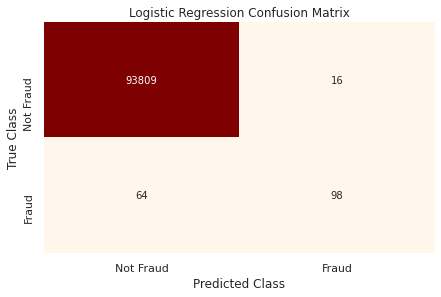

In [8]:
#Logistic Regression Model
LogisticRegressionModel = LogisticRegression(max_iter=200)
LogisticRegressionModel.fit(X_train, y_train)
LogisticRegressionModel_y_pred = LogisticRegressionModel.predict(X_test)


#Score
LogisticRegressionModel_TrainScore =  round(LogisticRegressionModel.score(X_train, y_train) * 100, 2)
LogisticRegressionModel_TestScore = round(LogisticRegressionModel.score(X_test, y_test) * 100, 2)

print('Logistic Regression Train Score: ', LogisticRegressionModel_TrainScore)
print('Logistic Regression Test Score: ', LogisticRegressionModel_TestScore)


#Confusion Matrix
LogisticRegressionModel_CM = confusion_matrix(y_test, LogisticRegressionModel_y_pred)
LogisticRegressionModel_ConfusionMatrix = pd.DataFrame(LogisticRegressionModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(LogisticRegressionModel_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

We apply the ***2nd*** model ***SVC***

SVC Train Score:  99.89
SVC Test Score:  99.81


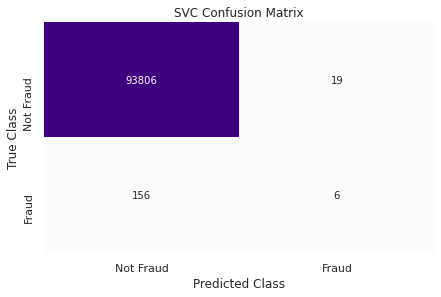

In [9]:
#SVC Model
SVCModel = SVC(kernel= 'rbf', max_iter=100, C=1.0, gamma='auto')
SVCModel.fit(X_train, y_train)
SVCModel_y_pred = SVCModel.predict(X_test)

#Score
SVCModel_TrainScore =  round(SVCModel.score(X_train, y_train) * 100, 2)
SVCModel_TestScore = round(SVCModel.score(X_test, y_test) * 100, 2)

print('SVC Train Score: ', SVCModel_TrainScore)
print('SVC Test Score: ',SVCModel_TestScore)


#Confusion Matrix
SVCModel_CM = confusion_matrix(y_test, SVCModel_y_pred)
SVCModel_ConfusionMatrix = pd.DataFrame(SVCModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(SVCModel_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

We apply the ***3rd*** model ***DecisionTree***

Decision Tree Train Score:  99.96
Decision Tree Test Score:  99.94


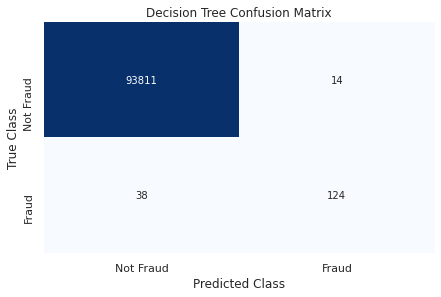

In [10]:
#Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) #criterion can be entropy
DecisionTreeModel.fit(X_train, y_train)
DecisionTreeModel_y_pred = DecisionTreeModel.predict(X_test)


#Score
DecisionTreeModel_TrainScore =  round(DecisionTreeModel.score(X_train, y_train) * 100, 2)
DecisionTreeModel_TestScore = round(DecisionTreeModel.score(X_test, y_test) * 100, 2)

print('Decision Tree Train Score: ' , DecisionTreeModel_TrainScore)
print('Decision Tree Test Score: ' , DecisionTreeModel_TestScore)


#Confusion Matrix
DecisionTreeModel_CM = confusion_matrix(y_test, DecisionTreeModel_y_pred)
DecisionTreeModel_ConfusionMatrix = pd.DataFrame(DecisionTreeModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

We apply the ***4th*** model ***RandomForest***

RandomForestModel Train Score:  99.95
RandomForestModel Test Score:  99.94


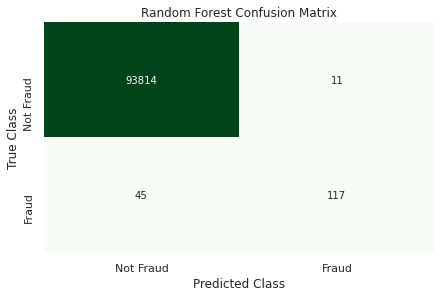

In [11]:
#Random Forest Model
RandomForestModel = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
RandomForestModel.fit(X_train, y_train)
RandomForestModel_y_pred = RandomForestModel.predict(X_test)


#Score
RandomForestModel_TrainScore =  round(RandomForestModel.score(X_train, y_train) * 100, 2)
RandomForestModel_TestScore = round(RandomForestModel.score(X_test, y_test) * 100, 2)

print('RandomForestModel Train Score: ' , RandomForestModel_TrainScore)
print('RandomForestModel Test Score: ' , RandomForestModel_TestScore)


#Confusion Matrix
RandomForestModel_CM = confusion_matrix(y_test, RandomForestModel_y_pred)
RandomForestModel_ConfusionMatrix = pd.DataFrame(RandomForestModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(RandomForestModel_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**We compare between models scores and accuracies**

In [12]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest'],
    'Train Score': [LogisticRegressionModel_TrainScore, SVCModel_TrainScore, DecisionTreeModel_TrainScore, RandomForestModel_TrainScore],
    'Test Score': [LogisticRegressionModel_TestScore, SVCModel_TestScore, DecisionTreeModel_TestScore, RandomForestModel_TestScore]})

models.sort_values(['Train Score', 'Test Score'], ascending=[False, False])

,Model,Train Score,Test Score
2,Decision Tree,99.96,99.94
3,Random Forest,99.95,99.94
0,Logistic Regression,99.92,99.91
1,Support Vector Machines,99.89,99.81


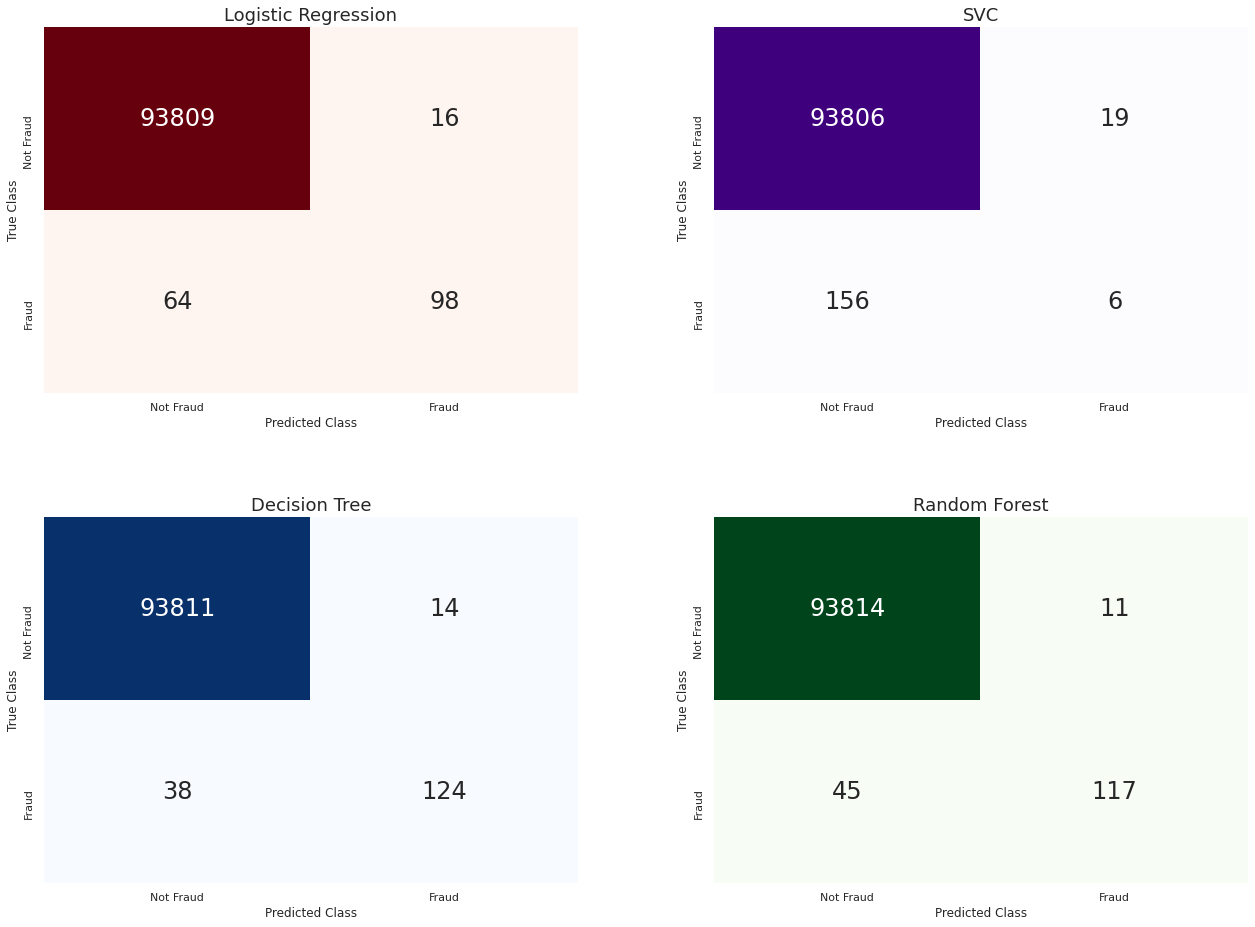

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(20,15))
fig.tight_layout(pad=10.0)
sns.set(font_scale=2)

sns.heatmap(LogisticRegressionModel_ConfusionMatrix, ax=ax[0][0], annot=True, cbar=None, cmap="Reds", fmt = 'g')
ax[0][0].set_title("Logistic Regression", fontsize=18)
ax[0][0].set_ylabel("True Class"), ax[0][0].set_xlabel("Predicted Class")


sns.heatmap(SVCModel_ConfusionMatrix, ax=ax[0][1], annot=True, cbar=None, cmap="Purples", fmt = 'g')
ax[0][1].set_title("SVC", fontsize=18)
ax[0][1].set_ylabel("True Class"), ax[0][1].set_xlabel("Predicted Class")


sns.heatmap(DecisionTreeModel_ConfusionMatrix, ax=ax[1][0], annot=True, cbar=None, cmap="Blues", fmt = 'g')
ax[1][0].set_title("Decision Tree", fontsize=18)
ax[1][0].set_ylabel("True Class"), ax[1][0].set_xlabel("Predicted Class")


sns.heatmap(RandomForestModel_ConfusionMatrix, ax=ax[1][1], annot=True, cbar=None, cmap="Greens", fmt = 'g')
ax[1][1].set_title("Random Forest", fontsize=18),
ax[1][1].set_ylabel("True Class"), ax[1][1].set_xlabel("Predicted Class")

plt.show()

**We use *Random Forest Model* to know the importance of each *Feature*.**

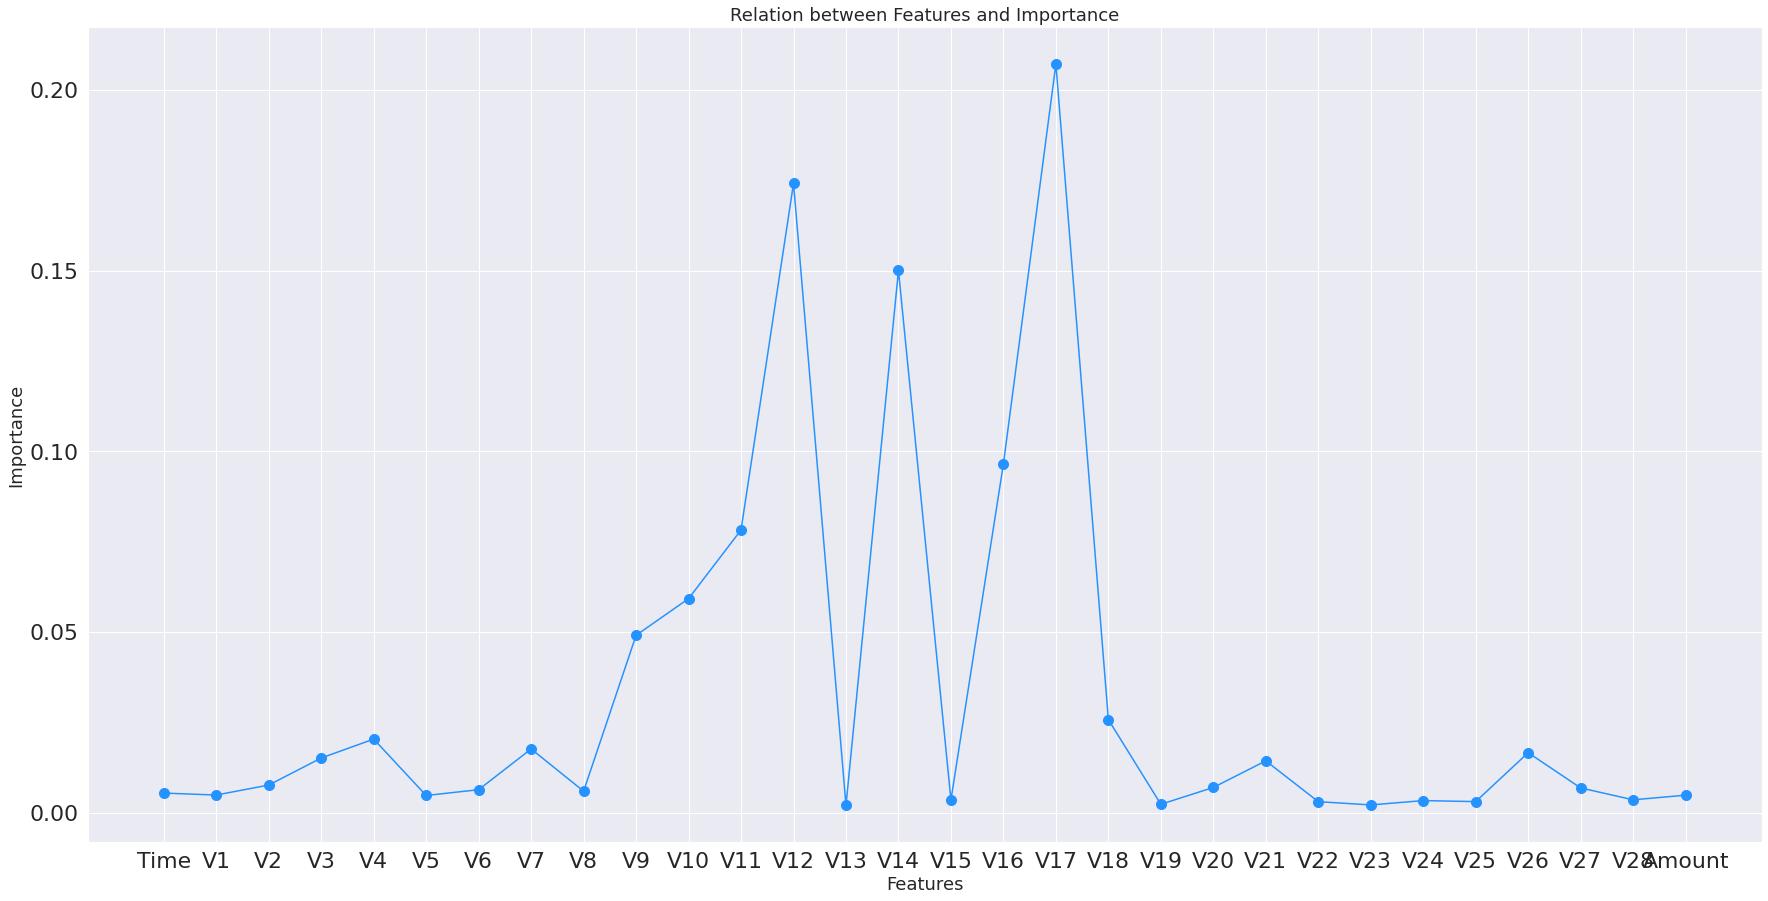

In [14]:
importance = RandomForestModel.feature_importances_

plt.figure(figsize=(30,15))
plt.ylabel('Importance', fontsize=18), plt.xlabel('Features', fontsize=18)
plt.title("Relation between Features and Importance", fontsize=18)
plt.plot(X.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.show()

The best model is **Decision Tree Model**.

The most 3 **Important Features** are: "**V17**", "**V12**", "**V14**".